## 1. Requeriments

In [53]:
# import torch
# print(torch.__version__)

# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
# !pip install torch-scatter torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cpu.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

## 2. Import libraries

In [54]:
import torch
from torch_geometric.data import Data
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import random

## 3. Graph building

### 3.1. Gene matrix

In [55]:
genes = pd.read_csv('..\..\Data\PPT-Ohmnet\mRCC_big_pool\mrcc_protein_matrix_80_genes_28_nodes.csv')
Y = genes.Y

genes = genes.iloc[:,1:29] 
genes

,APAF1,ARID1A,ATM,BAP1,EPAS1,ERBB2,GSTP1,HSPB1,HSPD1,IL6,...,RELA,RNF139,SETD2,SLC2A1,SOD2,TGM2,TP53,TSC1,TSC2,VHL
0,32.668769,33.848026,35.942429,33.677294,37.95811,35.32243,36.48088,38.25591,37.02204,29.74353,...,33.09884,32.46554,32.58565,33.38586,38.67433,38.50142,33.83518,32.93402,34.93520,32.30615
1,32.337493,33.843513,35.988225,32.643149,38.83281,33.71706,36.21403,37.41814,36.48920,24.29608,...,33.06941,32.27190,33.19915,33.69538,38.64559,34.33752,34.44810,33.16630,35.08304,32.19988
2,31.818198,33.516005,36.193587,32.368866,37.19345,33.38917,35.34069,37.94992,36.51745,33.97471,...,33.64965,32.55514,32.84628,36.23588,40.50559,35.50178,35.41980,33.63282,34.79244,31.49147
3,32.601293,34.197698,36.578348,31.895400,39.46713,33.22340,35.36208,37.86790,37.13423,31.49884,...,33.14439,33.19823,33.68316,34.41938,38.99231,35.77236,34.18862,32.88250,35.02014,32.11538
4,33.593121,33.351460,36.807497,33.968348,38.49884,33.40876,34.26885,35.26187,36.15876,33.92214,...,32.91133,30.89813,34.63036,34.59911,38.41437,33.47112,34.91241,33.44515,35.01310,33.33646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,32.603769,34.133940,35.318612,33.843872,39.13826,33.62978,35.75912,37.34151,35.52103,34.47504,...,33.45578,32.12573,33.34867,36.50807,35.15898,34.57504,35.39631,32.93248,35.12781,31.79913
177,33.619701,32.373330,35.771711,32.519967,35.86338,31.25871,37.02994,38.71080,36.75353,32.12763,...,32.33496,34.27276,32.16275,33.97705,38.85295,32.38354,32.04003,32.62658,33.78873,31.66344
178,33.316811,34.118843,36.008091,33.115209,37.91340,32.66502,35.47039,38.35448,35.94739,29.04315,...,33.26864,32.92305,34.01015,34.85694,37.96021,36.65499,33.34126,32.81059,35.24316,32.39461
179,33.046782,33.833796,37.008936,32.895151,37.96870,33.57688,33.76634,36.74006,35.82772,29.64267,...,33.53102,31.87160,33.23246,34.24055,37.24924,36.84744,34.98283,34.04810,35.60526,32.34561


In [56]:
scaler = preprocessing.MinMaxScaler()
names = genes.columns
d = scaler.fit_transform(genes)
genes = pd.DataFrame(d, columns=names)
genes

,APAF1,ARID1A,ATM,BAP1,EPAS1,ERBB2,GSTP1,HSPB1,HSPD1,IL6,...,RELA,RNF139,SETD2,SLC2A1,SOD2,TGM2,TP53,TSC1,TSC2,VHL
0,0.610274,0.474298,0.551095,0.703386,0.614968,0.879366,0.697909,0.655601,0.643912,0.477940,...,0.368870,0.547741,0.361620,0.420160,0.542412,0.945549,0.403803,0.411780,0.408244,0.681580
1,0.536117,0.472846,0.561963,0.465055,0.796869,0.573713,0.653713,0.472156,0.521794,0.081270,...,0.360624,0.504091,0.518369,0.458930,0.538144,0.301997,0.538341,0.474109,0.451980,0.664154
2,0.419872,0.367512,0.610698,0.401843,0.455951,0.511285,0.509070,0.588599,0.528269,0.786044,...,0.523208,0.567938,0.428211,0.777154,0.814317,0.481939,0.751632,0.599295,0.366011,0.547991
3,0.595169,0.586761,0.702007,0.292727,0.928781,0.479723,0.512613,0.570639,0.669624,0.605757,...,0.381633,0.712900,0.642034,0.549619,0.589625,0.523759,0.481384,0.397955,0.433372,0.650298
4,0.817191,0.314590,0.756387,0.770463,0.727417,0.515014,0.331552,0.000000,0.446063,0.782216,...,0.316330,0.194423,0.884044,0.572132,0.503813,0.168091,0.640258,0.548936,0.431290,0.850528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.595723,0.566255,0.403055,0.741776,0.860390,0.557095,0.578371,0.455376,0.299906,0.822477,...,0.468885,0.471142,0.556572,0.811248,0.020453,0.338707,0.746476,0.411366,0.465225,0.598440
177,0.823141,0.000000,0.510581,0.436667,0.179353,0.105657,0.788844,0.755208,0.582374,0.651544,...,0.154831,0.955115,0.253569,0.494212,0.568933,0.000000,0.009761,0.329281,0.069080,0.576190
178,0.755339,0.561399,0.566677,0.573847,0.605671,0.373411,0.530551,0.677185,0.397621,0.426940,...,0.416448,0.650870,0.725580,0.604427,0.436379,0.660174,0.295386,0.378658,0.499349,0.696085
179,0.694893,0.469721,0.804191,0.523132,0.617171,0.547024,0.248326,0.323678,0.370194,0.470596,...,0.489967,0.413858,0.526880,0.527218,0.330815,0.689918,0.655716,0.710731,0.606470,0.688050


### 3.2. Graph edges

In [57]:
path ='../../Data/PPT-Ohmnet/mRCC_big_pool/network_edges_mrcc_80_genes_28_nodes.tsv'
data = pd.read_csv(path, delimiter='\t')
edge_index1=data[data.columns[1]].to_numpy()
edge_index2=data[data.columns[2]].to_numpy()

In [58]:
edge_index = np.concatenate((edge_index1, edge_index2))

In [59]:
edge_index

array(['VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'VHL', 'GSTP1', 'GSTP1',
       'TGM2', 'TGM2', 'SETD2', 'ERBB2', 'ERBB2', 'NDRG1', 'NF2', 'NF2',
       'PIK3CA', 'MTOR', 'MTOR', 'APAF1', 'TSC1', 'RELA', 'RELA', 'RELA',
       'ATM', 'MAPK8', 'PTEN', 'PTEN', 'ARID1A', 'PTGS2', 'HSPB1',
       'HSPD1', 'SLC2A1', 'RNF139', 'ATM', 'TGM2', 'TP53', 'SOD2',
       'EPAS1', 'TGM2', 'MAPK8', 'RELA', 'PAK1', 'TP53', 'NF2', 'PAK1',
       'TP53', 'PAK1', 'TSC1', 'PTEN', 'TP53', 'MAPK8', 'TP53', 'TSC2',
       'IL6', 'TP53', 'ATM', 'TP53', 'TP53', 'TP53', 'BAP1', 'TP53',
       'TP53', 'TP53', 'PTEN'], dtype=object)

In [60]:
le = preprocessing.LabelEncoder()
le.fit(edge_index)
len(list(le.classes_))

28

In [61]:
edge_index1 = le.transform(edge_index1)
edge_index2 = le.transform(edge_index2)

In [62]:
edge_index = [edge_index1]+[edge_index2]
edge_index = np.array(edge_index)

In [63]:
edge_index

array([[27, 27, 27, 27, 27, 27, 27,  6,  6, 23, 23, 20,  5,  5, 12, 13,
        13, 15, 11, 11,  0, 25, 18, 18, 18,  2, 10, 16, 16,  1, 17,  7,
         8],
       [21, 19,  2, 23, 24, 22,  4, 23, 10, 18, 14, 24, 13, 14, 24, 14,
        25, 16, 24, 10, 24, 26,  9, 24,  2, 24, 24, 24,  3, 24, 24, 24,
        16]])

In [64]:
edge_index = torch.tensor(edge_index, dtype=torch.int64)
edge_index

tensor([[27, 27, 27, 27, 27, 27, 27,  6,  6, 23, 23, 20,  5,  5, 12, 13, 13, 15,
         11, 11,  0, 25, 18, 18, 18,  2, 10, 16, 16,  1, 17,  7,  8],
        [21, 19,  2, 23, 24, 22,  4, 23, 10, 18, 14, 24, 13, 14, 24, 14, 25, 16,
         24, 10, 24, 26,  9, 24,  2, 24, 24, 24,  3, 24, 24, 24, 16]])

### 3.3. Create dataset

In [65]:
list_data_0=[]
list_data_1=[]

for g in range(len(genes)):
  b=[]
  for i in genes.iloc[g].to_numpy():
    a=[]
    # a.append(Y[g])
    a.append(i*100)
    b.append(a)
  x = torch.tensor([b], dtype=torch.long).reshape([-1])
  edge_index = edge_index
  y = torch.tensor([Y.iloc[g]], dtype=torch.float).reshape([-1, 1])
  data = Data(x=x, edge_index=edge_index, y=y)
  if y == 0:
    list_data_0.append(data)
  else:
    list_data_1.append(data)

print(list_data_0[0])

Data(x=[28], edge_index=[2, 33], y=[1, 1])


C:\Users\sandr\AppData\Local\Temp/ipykernel_4456/1559691492.py:11: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = torch.tensor([b], dtype=torch.long).reshape([-1])


In [66]:
len(list_data_1)

96

### 3.4. Patient sample

In [67]:
data = list_data_0[0]
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of charcateristics per node: {data.num_features}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Number of nodes: 28
Number of charcateristics per node: 1
Number of edges: 33
Average node degree: 1.18
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## 4. Graph training

### 4.1. Train-Test splitting

In [68]:
# torch.manual_seed(1255)
# random.seed(125)
# random.shuffle(list_data_0)
# random.shuffle(list_data_1)

train_dataset = list_data_0[0:72]
test_dataset = list_data_0[72:86]
train_dataset = train_dataset + list_data_1[0:81]
test_dataset = test_dataset + list_data_1[81:97]
# random.shuffle(train_dataset)
# random.shuffle(test_dataset)
print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')
cont = 0
cont1=0
for i in train_dataset:
    if i.y == 0:
        cont+=1
for i in test_dataset:
    if i.y == 0:
        cont1+=1
print("Negative cases from train: " + str(cont) + " of " + str(len(train_dataset)) + " = " + str(cont/len(train_dataset)))
print("Negative cases from test: " + str(cont1) + " of " + str(len(test_dataset)) + " = " + str(cont1/len(test_dataset)))
print("It should be 46.9")

Number of training graphs: 153
Number of test graphs: 28
Negative cases from train: 72 of 153 = 0.47058823529411764
Negative cases from test: 13 of 28 = 0.4642857142857143
It should be 46.9


In [69]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 32
DataBatch(x=[896], edge_index=[2, 1056], y=[32, 1], batch=[896], ptr=[33])

Step 2:
Number of graphs in the current batch: 32
DataBatch(x=[896], edge_index=[2, 1056], y=[32, 1], batch=[896], ptr=[33])

Step 3:
Number of graphs in the current batch: 32
DataBatch(x=[896], edge_index=[2, 1056], y=[32, 1], batch=[896], ptr=[33])

Step 4:
Number of graphs in the current batch: 32
DataBatch(x=[896], edge_index=[2, 1056], y=[32, 1], batch=[896], ptr=[33])

Step 5:
Number of graphs in the current batch: 25
DataBatch(x=[700], edge_index=[2, 825], y=[25, 1], batch=[700], ptr=[26])



### 4.2. Training and testing the model

In [70]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GraphConv
from torch_geometric.nn import SAGPooling
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp
from torch import nn

In [71]:
embed_dim = 28

class Net(torch.nn.Module):
    def __init__(self, dim):
        super(Net, self).__init__()
        self.dim = dim
        super(Net, self).__init__()
        self.conv1 = GraphConv(embed_dim, dim)
        self.pool1 = SAGPooling(dim, ratio=0.5)
        self.conv2 = GraphConv(dim, dim)
        self.pool2 = SAGPooling(dim, ratio=0.5)
        self.item_embedding = torch.nn.Embedding(num_embeddings=101, embedding_dim=embed_dim)
        self.lin1 = torch.nn.Linear(448, 100)
        self.lin2 = torch.nn.Linear(100, 10)
        self.lin3 = torch.nn.Linear(100, 1)
        self.act1 = torch.nn.RReLU()
        print(self)

    def forward(self, x, edge_index, batch):
        x = torch.tensor(x) #.to(torch.int)
        # print(x.long())
        x = self.item_embedding(x)
        x = x.squeeze(1)

        x = F.relu(self.conv1(x, edge_index))
        x, edge_index, _, batch, _, _ = self.pool1(x, edge_index, None, batch)
        x1 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        # x = F.relu(self.conv2(x, edge_index))
        # x, edge_index, _, batch, _, _ = self.pool2(x, edge_index, None, batch)
        # x2 = torch.cat([gmp(x, batch), gap(x, batch)], dim=1)

        x = x1 #+ x2

        x = self.lin1(x)
        x = self.act1(x)
        # x = self.lin2(x)
        # x = self.act1(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = torch.sigmoid(self.lin3(x)).squeeze(1)
        return x


In [72]:
def train(epoch):
    model.train()
    criterion = nn.BCELoss()
    loss_all = 0
    for data in train_loader:
        output = model(data.x, data.edge_index, data.batch)
        loss = criterion(output, data.y.squeeze(1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all += loss.item() * data.num_graphs

    return loss_all / len(train_dataset)


def test(loader):
    model.eval()

    correct = 0
    for data in loader:
        data = data
        output = model(data.x, data.edge_index, data.batch)
        for i in range(len(output)):
            if output[i]>0.5:
                output[i]=1
            else:
                output[i]=0
            if output[i]==data.y[i]:
                correct=correct+1
    # print("Correct: "+str(correct) +" of "+str(len(loader.dataset)))
    return correct / len(loader.dataset)

Net(
  (conv1): GraphConv(28, 224)
  (pool1): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(224, 224)
  (pool2): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 28)
  (lin1): Linear(in_features=448, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=10, bias=True)
  (lin3): Linear(in_features=100, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.8706, Train Acc: 0.5294, Test Acc: 0.5357


C:\Users\sandr\AppData\Local\Temp/ipykernel_4456/4260732989.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x) #.to(torch.int)


Epoch: 002, Loss: 0.7180, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 003, Loss: 0.7077, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 004, Loss: 0.7074, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 005, Loss: 0.7057, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 006, Loss: 0.7003, Train Acc: 0.5359, Test Acc: 0.5714
Epoch: 007, Loss: 0.6990, Train Acc: 0.5359, Test Acc: 0.5714
Epoch: 008, Loss: 0.7005, Train Acc: 0.5490, Test Acc: 0.5714
Epoch: 009, Loss: 0.6964, Train Acc: 0.5556, Test Acc: 0.5714
Epoch: 010, Loss: 0.6919, Train Acc: 0.5621, Test Acc: 0.5714
Epoch: 011, Loss: 0.6909, Train Acc: 0.5817, Test Acc: 0.5714
Epoch: 012, Loss: 0.7063, Train Acc: 0.5556, Test Acc: 0.5714
Epoch: 013, Loss: 0.7039, Train Acc: 0.5556, Test Acc: 0.5714
Epoch: 014, Loss: 0.6960, Train Acc: 0.6013, Test Acc: 0.5357
Epoch: 015, Loss: 0.6730, Train Acc: 0.6144, Test Acc: 0.5714
Epoch: 016, Loss: 0.6592, Train Acc: 0.6471, Test Acc: 0.5357
Epoch: 017, Loss: 0.6354, Train Acc: 0.6275, Test Acc: 0.5714
Epoch: 0

No handles with labels found to put in legend.


Epoch: 052, Loss: 0.2726, Train Acc: 0.9085, Test Acc: 0.6071
Net(
  (conv1): GraphConv(28, 224)
  (pool1): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(224, 224)
  (pool2): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 28)
  (lin1): Linear(in_features=448, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=10, bias=True)
  (lin3): Linear(in_features=100, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.8747, Train Acc: 0.5163, Test Acc: 0.5357
Epoch: 002, Loss: 0.7085, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 003, Loss: 0.7015, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 004, Loss: 0.6985, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 005, Loss: 0.6979, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 006, Loss: 0.6971, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 007, Loss: 0.6942, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 008, Loss: 0.6880, 

No handles with labels found to put in legend.


Epoch: 044, Loss: 0.3322, Train Acc: 0.8366, Test Acc: 0.5714
Epoch: 045, Loss: 0.2520, Train Acc: 0.9085, Test Acc: 0.5357
Net(
  (conv1): GraphConv(28, 224)
  (pool1): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(224, 224)
  (pool2): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 28)
  (lin1): Linear(in_features=448, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=10, bias=True)
  (lin3): Linear(in_features=100, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.9620, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 002, Loss: 0.8161, Train Acc: 0.4967, Test Acc: 0.5357
Epoch: 003, Loss: 0.7005, Train Acc: 0.5359, Test Acc: 0.5714
Epoch: 004, Loss: 0.6985, Train Acc: 0.5621, Test Acc: 0.7143
Epoch: 005, Loss: 0.6975, Train Acc: 0.5752, Test Acc: 0.6071
Epoch: 006, Loss: 0.6951, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 007, Loss: 0.6959, 

No handles with labels found to put in legend.


Epoch: 037, Loss: 0.2832, Train Acc: 0.8627, Test Acc: 0.5714
Epoch: 038, Loss: 0.2867, Train Acc: 0.9150, Test Acc: 0.6429
Net(
  (conv1): GraphConv(28, 224)
  (pool1): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(224, 224)
  (pool2): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 28)
  (lin1): Linear(in_features=448, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=10, bias=True)
  (lin3): Linear(in_features=100, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 0.8040, Train Acc: 0.4902, Test Acc: 0.5000
Epoch: 002, Loss: 0.7112, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 003, Loss: 0.6990, Train Acc: 0.5229, Test Acc: 0.5357
Epoch: 004, Loss: 0.7014, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 005, Loss: 0.7000, Train Acc: 0.5229, Test Acc: 0.5357
Epoch: 006, Loss: 0.6958, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 007, Loss: 0.6976, 

No handles with labels found to put in legend.


Epoch: 086, Loss: 0.1877, Train Acc: 0.8889, Test Acc: 0.5000
Epoch: 087, Loss: 0.1918, Train Acc: 0.8954, Test Acc: 0.5714
Epoch: 088, Loss: 0.1766, Train Acc: 0.9020, Test Acc: 0.6786
Net(
  (conv1): GraphConv(28, 224)
  (pool1): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (conv2): GraphConv(224, 224)
  (pool2): SAGPooling(GraphConv, 224, ratio=0.5, multiplier=1.0)
  (item_embedding): Embedding(101, 28)
  (lin1): Linear(in_features=448, out_features=100, bias=True)
  (lin2): Linear(in_features=100, out_features=10, bias=True)
  (lin3): Linear(in_features=100, out_features=1, bias=True)
  (act1): RReLU(lower=0.125, upper=0.3333333333333333)
)
Epoch: 001, Loss: 1.1634, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 002, Loss: 1.7458, Train Acc: 0.5294, Test Acc: 0.5357
Epoch: 003, Loss: 0.8384, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 004, Loss: 0.6982, Train Acc: 0.5425, Test Acc: 0.5357
Epoch: 005, Loss: 0.6999, Train Acc: 0.5359, Test Acc: 0.5357
Epoch: 006, Loss: 0.6958, 

No handles with labels found to put in legend.


Test accuracy: 0.6071428571428571
Test stv: 0.050507627227610555


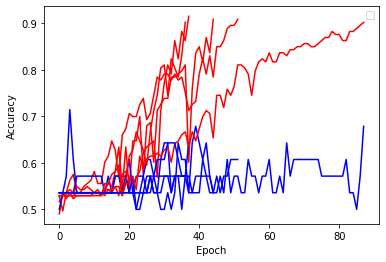

In [73]:
import matplotlib.pyplot as plt
test_avg = []
for i in range(5):
    model = Net(dim=224)
    # optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.6)
    optimizer = torch.optim.Adadelta(model.parameters(), lr=1)

    train_epoch=[]
    test_epoch=[]
    epoch = 1
    train_acc=0
    while train_acc < 0.9 and epoch < 100:
        loss = train(epoch)
        train_acc = test(train_loader)
        test_acc = test(test_loader)
        train_epoch.append(train_acc)
        test_epoch.append(test_acc)
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, '
            f'Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
        epoch +=1

    plt.plot(train_epoch, color="red")
    plt.plot(test_epoch, color="blue")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    test_avg.append(test_acc)

print('Test accuracy: '+ str(np.array(test_avg).mean()))
print('Test stv: '+ str(np.array(test_avg).std()))